# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the LCL dataset

In [2]:
# Load the LCL dataset
LCL_df = pd.read_csv('/content/drive/MyDrive/Low Carbon dataset/CC_LCL-FullData.csv')

In [3]:
# Strip leading/trailing spaces from column names
LCL_df.columns = LCL_df.columns.str.strip()

# Convert DateTime column to datetime
LCL_df['DateTime'] = pd.to_datetime(LCL_df['DateTime'])

# Convert 'KWH/hh (per half hour)' column to numeric
LCL_df['KWH/hh (per half hour)'] = pd.to_numeric(LCL_df['KWH/hh (per half hour)'], errors='coerce')

# Statistic of the Data

In [4]:
LCL_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167932474 entries, 0 to 167932473
Data columns (total 4 columns):
 #   Column                  Dtype         
---  ------                  -----         
 0   LCLid                   object        
 1   stdorToU                object        
 2   DateTime                datetime64[ns]
 3   KWH/hh (per half hour)  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 5.0+ GB


In [5]:
LCL_df.isnull().sum()

LCLid                        0
stdorToU                     0
DateTime                     0
KWH/hh (per half hour)    5560
dtype: int64

In [6]:
LCL_df.describe()

,DateTime,KWH/hh (per half hour)
count,167932474,1.679269e+08
mean,2013-03-28 05:35:22.133241344,2.117630e-01
min,2011-11-23 09:00:00,0.000000e+00
25%,2012-10-21 20:30:00,5.800000e-02
50%,2013-03-30 05:30:00,1.170000e-01
75%,2013-09-10 09:00:00,2.390000e-01
max,2014-02-28 00:00:00,1.076100e+01
std,NaN,2.972592e-01


# Load the Tariffs data

In [7]:
# Load the Tariffs data
tariffs_path = '/content/drive/MyDrive/Low Carbon dataset/Tariffs.xlsx'
tariffs = pd.read_excel(tariffs_path)

In [8]:
tariffs.head()

,TariffDateTime,Tariff
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal


# Statistic of the Data

In [9]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   TariffDateTime  17520 non-null  datetime64[ns]
 1   Tariff          17520 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 273.9+ KB


In [10]:
tariffs.isnull().sum()

TariffDateTime    0
Tariff            0
dtype: int64

In [11]:
tariffs.describe()

,TariffDateTime
count,17520
mean,2013-07-02 11:45:00
min,2013-01-01 00:00:00
25%,2013-04-02 05:52:30
50%,2013-07-02 11:45:00
75%,2013-10-01 17:37:30
max,2013-12-31 23:30:00


# Merge datasets

In [12]:
# Merge datasets on 'DateTime' and 'TariffDateTime'
merged_df = pd.merge(LCL_df, tariffs, left_on='DateTime', right_on='TariffDateTime', how='left')

# Optionally, you may want to drop the 'TariffDateTime' column after merging
merged_df.drop('TariffDateTime', axis=1, inplace=True)

In [13]:
# Display the merged dataset to verify
merged_df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Tariff
0,MAC000002,Std,2012-10-12 00:30:00,0.0,NaN
1,MAC000002,Std,2012-10-12 01:00:00,0.0,NaN
2,MAC000002,Std,2012-10-12 01:30:00,0.0,NaN
3,MAC000002,Std,2012-10-12 02:00:00,0.0,NaN
4,MAC000002,Std,2012-10-12 02:30:00,0.0,NaN


# Extract additional features

In [14]:
# Extract additional features from DateTime for analysis (e.g., hour, day of week, etc.)
merged_df['Hour'] = merged_df['DateTime'].dt.hour
merged_df['DayOfWeek'] = merged_df['DateTime'].dt.day_name()

In [15]:
merged_df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Tariff,Hour,DayOfWeek
0,MAC000002,Std,2012-10-12 00:30:00,0.0,NaN,0,Friday
1,MAC000002,Std,2012-10-12 01:00:00,0.0,NaN,1,Friday
2,MAC000002,Std,2012-10-12 01:30:00,0.0,NaN,1,Friday
3,MAC000002,Std,2012-10-12 02:00:00,0.0,NaN,2,Friday
4,MAC000002,Std,2012-10-12 02:30:00,0.0,NaN,2,Friday


# Energy consumption by hour of day

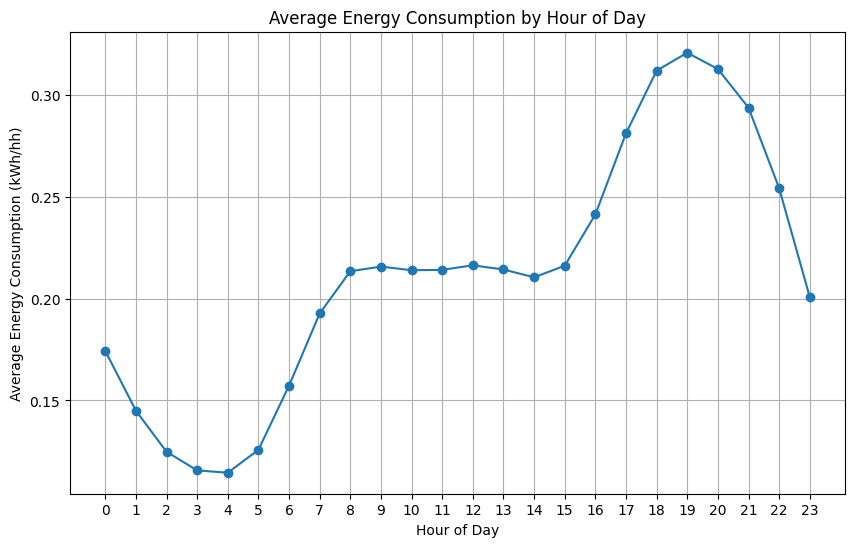

In [16]:
# Average energy consumption by hour of day
hourly_consumption = merged_df.groupby('Hour')['KWH/hh (per half hour)'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_consumption.index, hourly_consumption.values, marker='o')
plt.title('Average Energy Consumption by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (kWh/hh)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Energy consumption by day

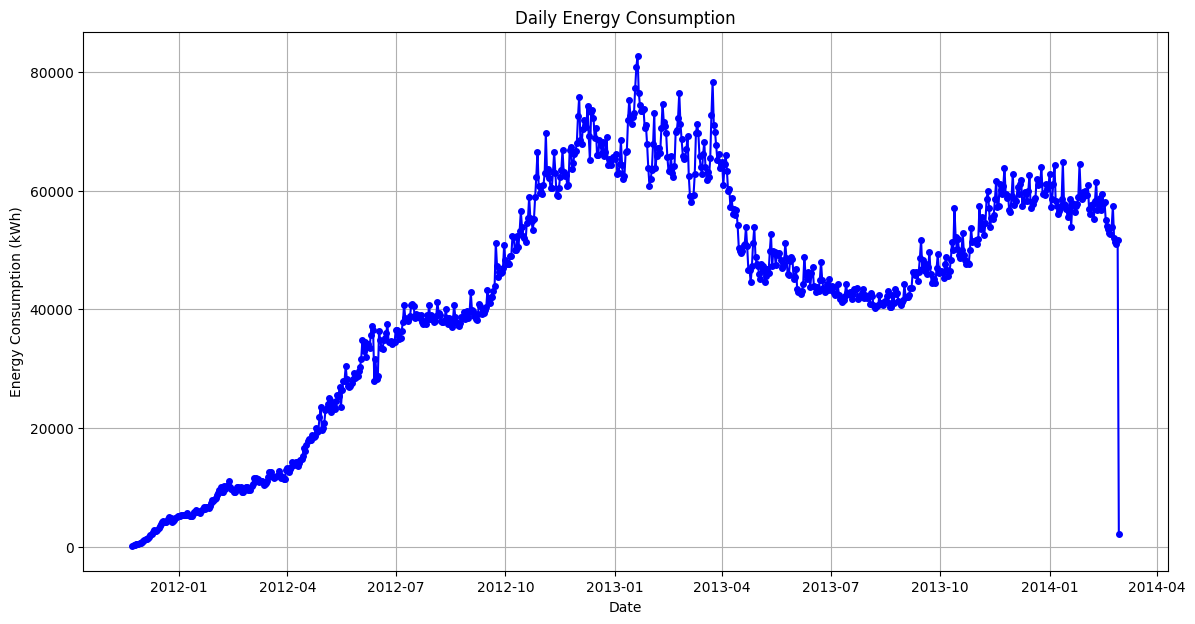

In [17]:
# Aggregate energy consumption by day
daily_energy = merged_df.groupby(merged_df['DateTime'].dt.date)['KWH/hh (per half hour)'].sum()

# Convert index to datetime for plotting
daily_energy.index = pd.to_datetime(daily_energy.index)

# Plotting daily energy consumption
plt.figure(figsize=(14, 7))
plt.plot(daily_energy.index, daily_energy.values, marker='.', linestyle='-', markersize=8, color='b')
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kWh)')
plt.grid(True)
plt.show()


In [18]:
merged_df

,LCLid,stdorToU,DateTime,KWH/hh (per half hour),Tariff,Hour,DayOfWeek
0,MAC000002,Std,2012-10-12 00:30:00,0.000,NaN,0,Friday
1,MAC000002,Std,2012-10-12 01:00:00,0.000,NaN,1,Friday
2,MAC000002,Std,2012-10-12 01:30:00,0.000,NaN,1,Friday
3,MAC000002,Std,2012-10-12 02:00:00,0.000,NaN,2,Friday
4,MAC000002,Std,2012-10-12 02:30:00,0.000,NaN,2,Friday
...,...,...,...,...,...,...,...
167932469,MAC005565,ToU,2012-06-21 05:30:00,1.022,NaN,5,Thursday
167932470,MAC005565,ToU,2012-06-21 06:00:00,0.188,NaN,6,Thursday
167932471,MAC005565,ToU,2012-06-21 06:30:00,0.073,NaN,6,Thursday
167932472,MAC005565,ToU,2012-06-21 07:00:00,0.025,NaN,7,Thursday


# Seasonal Trends: Energy Consumption Variations Across Seasons

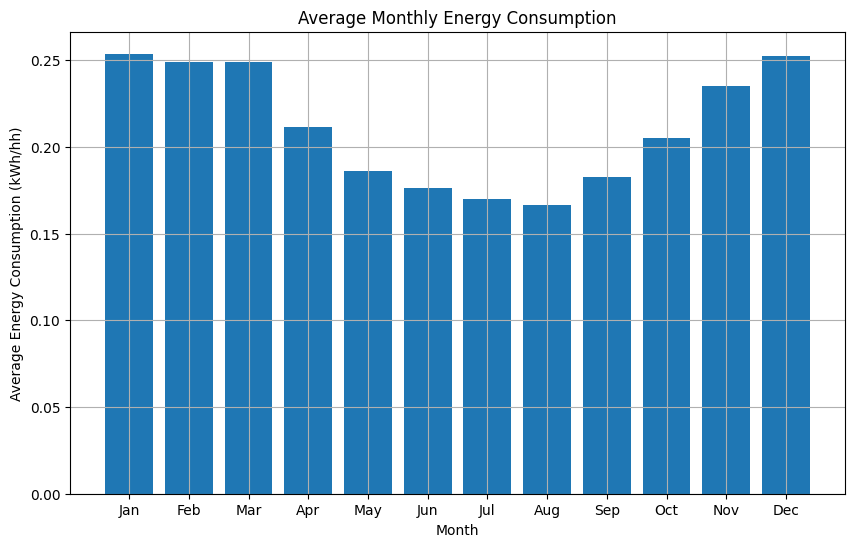

In [19]:
# Extract month and year from DateTime
merged_df['Month'] = merged_df['DateTime'].dt.month

# Aggregate energy consumption by month
monthly_energy = merged_df.groupby('Month')['KWH/hh (per half hour)'].mean()

# Plot monthly energy consumption
plt.figure(figsize=(10, 6))
plt.bar(monthly_energy.index, monthly_energy.values)
plt.title('Average Monthly Energy Consumption')
plt.xlabel('Month')
plt.ylabel('Average Energy Consumption (kWh/hh)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


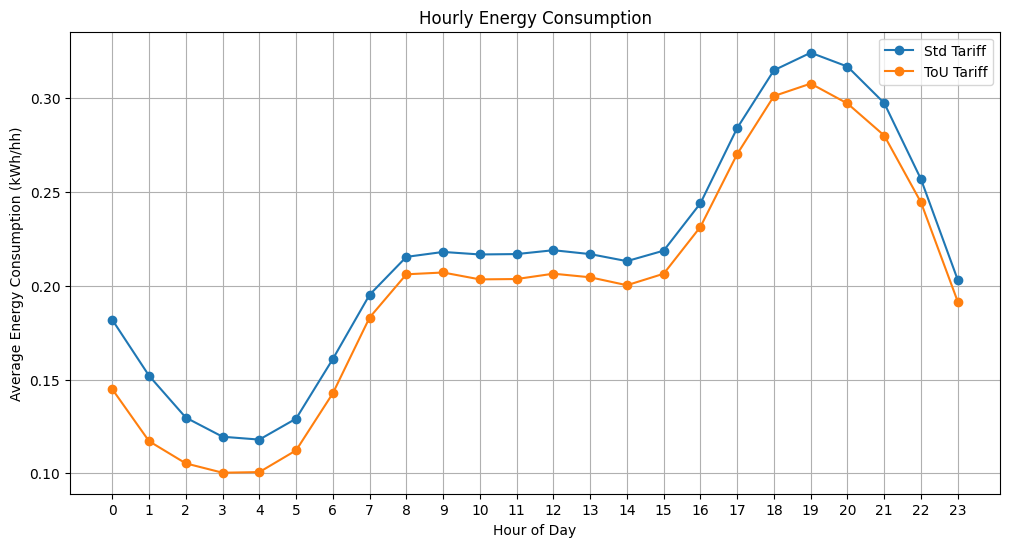

In [20]:
# Filter data for Std and ToU tariffs
std_data = merged_df[merged_df['stdorToU'] == 'Std']
tou_data = merged_df[merged_df['stdorToU'] == 'ToU']

# Aggregate energy consumption by hour for Std tariff
std_hourly_consumption = std_data.groupby(std_data['DateTime'].dt.hour)['KWH/hh (per half hour)'].mean()

# Aggregate energy consumption by hour for ToU tariff
tou_hourly_consumption = tou_data.groupby(tou_data['DateTime'].dt.hour)['KWH/hh (per half hour)'].mean()

# Plotting hourly energy consumption for Std and ToU tariffs
plt.figure(figsize=(12, 6))
plt.plot(std_hourly_consumption.index, std_hourly_consumption.values, marker='o', linestyle='-', label='Std Tariff')
plt.plot(tou_hourly_consumption.index, tou_hourly_consumption.values, marker='o', linestyle='-', label='ToU Tariff')
plt.title('Hourly Energy Consumption')
plt.xlabel('Hour of Day')
plt.ylabel('Average Energy Consumption (kWh/hh)')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.show()
